# Here, I will be re-running Tianxin's analyses for the Sidewalk View Data only. 

In [1]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler 

### Setting up Mid-Level Sidewalk View Data

#### Importing Mid-Level Output .CSV File

In [2]:
df_mid_level = pd.read_csv("/Volumes/GNA_SCHOOL_HD/street_psych/CSVs/mid_level_output.csv", index_col=0) #id column not index[0]

#### Extracting the Sidewalk Data only from the Output File

In [3]:
df_mid_level = df_mid_level.iloc[::-1]
df_mid_level_sidewalk = df_mid_level[df_mid_level.index.str.startswith('p1s')]
df_mid_level_sidewalk = pd.DataFrame.sort_index(df_mid_level_sidewalk, axis=0)
df_mid_level_sidewalk = df_mid_level_sidewalk.head(552) #using the first 552 images only
df_mid_level_sidewalk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,,,,,,,,,,,,,,,,,,,,
p1s00001_pred_label_img,0.350957,0.049629,0.121260,0.000000,0.006764,0.014512,0.000212,0.005234,0.107591,0.004707,0.311891,0.001914,0.000443,0.014899,0.000059,0.000036,0.0,0.000107,0.000615,0.009170
p1s00002_pred_label_img,0.177327,0.173786,0.206553,0.000000,0.019717,0.009069,0.000098,0.001351,0.191335,0.014281,0.144495,0.009095,0.000000,0.017161,0.007510,0.000000,0.0,0.000000,0.003623,0.024600
p1s00003_pred_label_img,0.091735,0.049128,0.475596,0.000000,0.026247,0.007627,0.000010,0.002074,0.174303,0.021712,0.000003,0.006465,0.000000,0.136650,0.000000,0.000000,0.0,0.000000,0.000000,0.008451
p1s00004_pred_label_img,0.259766,0.015632,0.263096,0.000000,0.009772,0.006263,0.000003,0.001921,0.258818,0.018753,0.100693,0.000964,0.000000,0.055573,0.000000,0.000000,0.0,0.000000,0.000000,0.008747
p1s00005_pred_label_img,0.338206,0.018011,0.019707,0.000553,0.037057,0.007676,0.000020,0.004388,0.077868,0.002552,0.429313,0.000007,0.000000,0.044294,0.002767,0.002243,0.0,0.000000,0.000000,0.015339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p1s00548_pred_label_img,0.185469,0.017314,0.142171,0.000085,0.023874,0.010671,0.004593,0.006520,0.037891,0.000013,0.324762,0.005228,0.000000,0.211247,0.000462,0.000000,0.0,0.000000,0.003363,0.026338
p1s00549_pred_label_img,0.354827,0.006423,0.072594,0.000000,0.005853,0.008356,0.000267,0.000007,0.049587,0.000540,0.402181,0.002630,0.000000,0.025762,0.040856,0.000000,0.0,0.000000,0.000007,0.030111
p1s00550_pred_label_img,0.004320,0.105150,0.410827,0.014310,0.080036,0.020238,0.000544,0.010397,0.000566,0.000000,0.115270,0.024749,0.000000,0.179961,0.000000,0.000000,0.0,0.000000,0.000000,0.033633


#### Renaming the Columns to the Mid-Level Features

In [4]:
df_mid_level_sidewalk = df_mid_level_sidewalk.rename(columns={'0': 'Road', '1': 'Sidewalk', '2': 'Building', '3': 'Wall', '4': 'Fence',
	'5': 'Pole', '6': 'Traffic Light', '7': 'Traffic Sign', '8': 'Vegetation', '9': 'Terrain', '10': 'Sky',
	'11': 'Person', '12': 'Rider', '13': 'Car', '14': 'Truck', '15': 'Bus', '16': 'Train', '17': 'Motorcycle',
	'18': 'Bicycle', '19': 'Others'}) 

### Setting up Low-Level Data

#### Importing the Low-Level Output .CSV File 

In [5]:
df_low_level = pd.read_csv("/Volumes/GNA_SCHOOL_HD/street_psych/CSVs/low_level_output.csv", encoding='latin-1', index_col=0) 

#### Extracting the Sidewalk Data only from the Output File

In [6]:
df_low_level = df_low_level.iloc[::-1]
df_low_level_sidewalk = df_low_level[df_low_level.index.str.startswith('p1s')]
df_low_level_sidewalk = pd.DataFrame.sort_index(df_low_level_sidewalk, axis=0)
df_low_level_sidewalk = df_low_level_sidewalk.head(552) #using the first 552 images only
df_low_level_sidewalk

,ED,Hue,Sat,Lum,sdHue,sdSat,sdBright,Entropy,StraightED,NonStraightED
name,,,,,,,,,,
p1s00001.jpg Ê Ê,0.096087,1.44900,0.15934,0.61673,1.9318,0.087734,0.26846,7.6340,0.042888,0.057226
p1s00002.jpgÊ Ê Ê,0.109100,0.99731,0.32012,0.54062,1.0994,0.222380,0.20556,7.5601,0.082817,0.043203
p1s00003.jpgÊ Ê Ê,0.123050,-2.41730,0.13720,0.44990,1.4764,0.129010,0.16904,7.3464,0.132500,0.017248
p1s00004.jpgÊ Ê Ê,0.114580,0.26999,0.24931,0.58799,1.4923,0.238560,0.25732,7.4998,0.100960,0.035377
p1s00005.jpgÊ Ê Ê,0.083636,0.71266,0.17180,0.64629,2.3318,0.157750,0.21831,7.3636,0.065085,0.038066
...,...,...,...,...,...,...,...,...,...,...
p1s00548.jpg Ê Ê,0.097567,2.18540,0.20458,0.58688,1.9465,0.139570,0.18192,7.3836,0.075435,0.033587
p1s00549.jpg Ê Ê,0.089502,1.31870,0.12784,0.68917,1.9844,0.133550,0.23285,7.4013,0.063623,0.038665
p1s00550.jpgÊ Ê Ê,0.102450,0.68272,0.17373,0.53614,1.5029,0.154220,0.21012,7.7372,0.095021,0.024353


### Setting up Quality Ratings data

#### Importing the Score Table 2 .CSV File

In [7]:
df_quality_ratings = pd.read_csv("/Volumes/GNA_SCHOOL_HD/street_psych/CSVs/scoreTable_2.csv", index_col=0) #scoreTable_2

#### Renaming/reorganizing Columns According to Tianxin's Analyses

In [8]:
df_quality_ratings = df_quality_ratings.drop(['Humanscale', 'Order'], axis=1)
df_quality_ratings = df_quality_ratings.rename(columns={"Order2" : "Disorder", "Humanscale2" : "Humanscale"})


### Correlogram of the Following Perceptual Qualities: Preference, Imageability, Complexity, Enclosure, Transparency, Humanscale, and Disorder

#### Creating a function that will give the pearson's correlation on each correlation plot

In [9]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    corrcoeff = 'r'
    ax.annotate(f'{corrcoeff} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

#### Creating the Correlogram/Correlation Matrix for the Perceptual Qualities

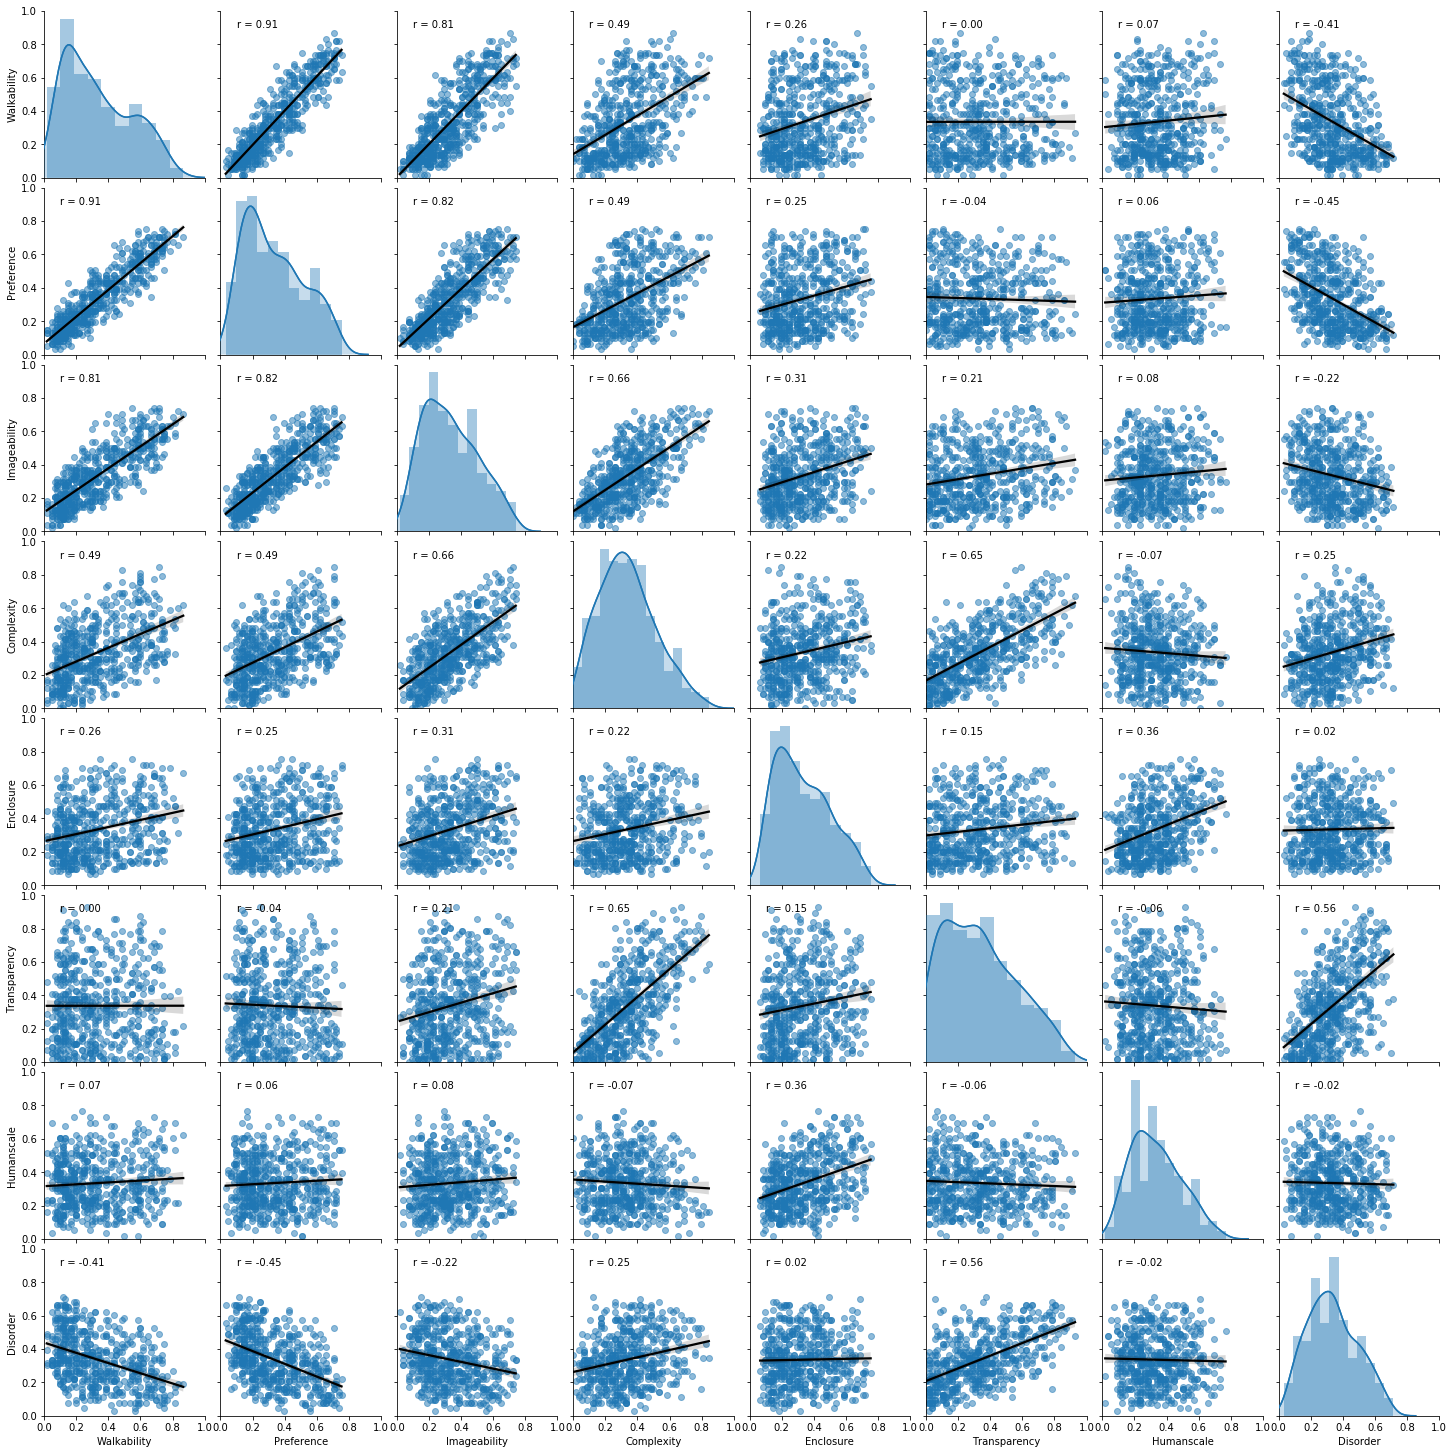

In [10]:
corrgram_qualities = sns.pairplot(df_quality_ratings, kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'alpha': 0.5}})
corrgram_qualities.set(xlim=(0.0,1.0), ylim =(0.0,1.0))
corrgram_qualities.map_upper(corrfunc)
corrgram_qualities.map_lower(corrfunc)
corrgram_qualities.map_diag(sns.distplot)
plt.show()

### Prep for Regression Analysis

#### Standardizing Mid-Level Data

In [39]:
scaler = StandardScaler() #will normalize the features (each column of X, INDIVIDUALLY) so that each feature will have mean = 0 and standard deviation = 1.
standardized_mid_level_sidewalk = scaler.fit_transform(df_mid_level_sidewalk)
#standardized_mid_level_sidewalk = sm.add_constant(standardized_mid_level_sidewalk) #All measures of data spread remain constant
standardized_mid_level_sidewalk = pd.DataFrame(standardized_mid_level_sidewalk)
standardized_mid_level_sidewalk.columns=['Road', 'Sidewalk', 'Building', 'Wall','Fence', 'Pole', 'Traffic Light', 'Traffic Sign', 'Vegetation','Terrain', 'Sky',
'Person', 'Rider', 'Car','Truck', 'Bus', 'Train','Motorcycle','Bicycle', 'Others']

standardized_mid_level_sidewalk

,Road,Sidewalk,Building,Wall,Fence,Pole,Traffic Light,Traffic Sign,Vegetation,Terrain,Sky,Person,Rider,Car,Truck,Bus,Train,Motorcycle,Bicycle,Others
0,1.592145,-0.399671,-0.691806,-0.256668,-0.669962,0.067743,-0.341201,0.019360,-0.385003,-0.525896,1.185182,-0.031355,0.552860,-0.627569,-0.209888,-0.127230,-0.042601,-0.047787,-0.089960,-0.569575
1,0.052586,1.586290,-0.175451,-0.256668,-0.359461,-0.389700,-0.379219,-0.545105,0.186339,-0.387241,-0.096950,1.038934,-0.146619,-0.598821,0.141004,-0.131903,-0.042601,-0.089280,0.667726,-0.031163
2,-0.706355,-0.407689,1.453308,-0.256668,-0.202923,-0.510901,-0.408547,-0.440066,0.070142,-0.279608,-1.203657,0.646915,-0.146619,0.919569,-0.212647,-0.131903,-0.042601,-0.089280,-0.244941,-0.594678
3,0.783558,-0.943479,0.166854,-0.256668,-0.597858,-0.625535,-0.410719,-0.462304,0.646748,-0.322463,-0.432443,-0.173025,-0.146619,-0.110712,-0.212647,-0.131903,-0.042601,-0.089280,-0.244941,-0.584342
4,1.479086,-0.905416,-1.306596,-0.205614,0.056232,-0.506797,-0.405288,-0.103659,-0.587791,-0.557107,2.084549,-0.315666,-0.146619,-0.254043,-0.082347,0.160789,-0.042601,-0.089280,-0.244941,-0.354324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.124774,-0.916559,-0.565210,-0.248859,-0.259810,-0.255094,1.120852,0.206253,-0.860537,-0.593880,1.283765,0.462550,-0.146619,1.867492,-0.190879,-0.131903,-0.042601,-0.089280,0.602125,0.029494
548,1.626464,-1.090782,-0.986422,-0.256668,-0.691812,-0.449617,-0.322736,-0.740515,-0.780741,-0.586243,1.876736,0.075383,-0.146619,-0.489534,1.711357,-0.131903,-0.042601,-0.089280,-0.243301,0.161143
549,-1.481460,0.488417,1.061203,1.063515,1.086528,0.548989,-0.230407,0.769771,-1.115182,-0.594069,-0.320795,3.372127,-0.146619,1.469931,-0.212647,-0.131903,-0.042601,-0.089280,-0.244941,0.284047
550,1.921537,-0.929785,-0.633947,-0.204713,-0.832119,-0.301057,-0.411806,0.180230,-0.811833,-0.509584,1.649302,0.312632,-0.146619,-0.677208,-0.212034,-0.131903,-0.042601,-0.089280,-0.244941,-0.576050


#### Standardizing Low-Level Data

In [12]:
standardized_low_level_sidewalk = scaler.fit_transform(df_low_level_sidewalk)
#standardized_low_level_sidewalk = sm.add_constant(standardized_low_level_sidewalk)
standardized_low_level_sidewalk = pd.DataFrame(standardized_low_level_sidewalk)
standardized_low_level_sidewalk.columns=['ED', 'Hue', 'Sat','Lum', 'sdHue', 'sdSat', 'sdBright', 
'Entropy', 'StraightED', 'NonStraightED']
standardized_low_level_sidewalk

,ED,Hue,Sat,Lum,sdHue,sdSat,sdBright,Entropy,StraightED,NonStraightED
0,-0.680351,0.583953,-0.852574,0.951312,1.012387,-1.861432,1.581821,1.068672,-1.774746,0.601819
1,0.165669,0.247061,1.458902,0.125965,-0.688765,1.424554,-0.087188,0.749974,0.173769,0.007016
2,1.072607,-2.299719,-1.170873,-0.857815,0.081699,-0.854106,-1.056221,-0.171620,2.598274,-1.093898
3,0.521943,-0.295409,0.440892,0.639652,0.114194,1.819421,1.286228,0.489927,1.059138,-0.324934
4,-1.489833,0.034755,-0.673441,1.271865,1.829856,-0.152717,0.251125,-0.097444,-0.691544,-0.210877
...,...,...,...,...,...,...,...,...,...,...
547,-0.584131,1.133196,-0.202175,0.627615,1.042429,-0.596393,-0.714459,-0.011193,-0.186469,-0.400859
548,-1.108464,0.486769,-1.305438,1.736861,1.119884,-0.743309,0.636934,0.065139,-0.762888,-0.185469
549,-0.266670,0.012425,-0.645694,0.077384,0.135857,-0.238866,0.033809,1.513729,0.769318,-0.792531
550,-0.749460,0.264059,-1.499236,1.819711,0.412979,-0.699869,0.124291,-0.034050,-0.155725,-0.373670


#### Standardizing Perceptual Quality Data

In [13]:
standardized_quality_ratings = scaler.fit_transform(df_quality_ratings)
#standardized_quality_ratings = sm.add_constant(standardized_quality_ratings) #All measures of data spread remain constant
standardized_quality_ratings = pd.DataFrame(standardized_quality_ratings)
standardized_quality_ratings.columns=["Walkability", "Preference", "Imageability", "Complexity", "Enclosure", "Transparency", "Humanscale", "Disorder"]
standardized_quality_ratings

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,-0.328069,-0.396165,-0.338632,-0.538060,-0.332572,0.167202,0.599738,-0.738702
1,1.841204,2.017750,2.287950,2.898411,-0.820297,1.115442,-1.113798,0.084024
2,-0.006695,-0.038547,-0.229192,0.934713,0.837968,1.984662,-0.314148,-0.224498
3,1.118113,1.481325,1.521864,2.014747,0.252698,1.589562,-0.085677,-0.430180
4,-0.810130,-0.217356,-0.448073,0.934713,-1.210477,-0.860058,-1.113798,0.803909
...,...,...,...,...,...,...,...,...
547,-0.729786,-0.664377,-0.995278,1.327453,-1.405567,0.167202,-1.799213,1.523795
548,-0.970817,-1.111399,-1.433042,-0.734430,-1.112932,-0.860058,-0.199913,-0.533021
549,-1.211847,-1.290207,-0.557514,0.836528,-0.625207,1.431522,0.713973,2.140840
550,-0.970817,-0.843186,-1.214160,-1.028985,-0.235027,-0.227898,-0.885327,-0.430180


###### Reindexing df_quality_ratings

In [14]:
df_quality_ratings = df_quality_ratings.reset_index(drop=True)
df_quality_ratings

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,0.266667,0.262295,0.277778,0.241379,0.278689,0.375000,0.428571,0.222222
1,0.716667,0.704918,0.722222,0.844828,0.196721,0.589286,0.160714,0.349206
2,0.333333,0.327869,0.296296,0.500000,0.475410,0.785714,0.285714,0.301587
3,0.566667,0.606557,0.592593,0.689655,0.377049,0.696429,0.321429,0.269841
4,0.166667,0.295082,0.259259,0.500000,0.131148,0.142857,0.160714,0.460317
...,...,...,...,...,...,...,...,...
547,0.183333,0.213115,0.166667,0.568966,0.098361,0.375000,0.053571,0.571429
548,0.133333,0.131148,0.092593,0.206897,0.147541,0.142857,0.303571,0.253968
549,0.083333,0.098361,0.240741,0.482759,0.229508,0.660714,0.446429,0.666667
550,0.133333,0.180328,0.129630,0.155172,0.295082,0.285714,0.196429,0.269841


##### Concatenating all DataFrames to prep for OLS

In [15]:
all_sidewalk_feat = pd.concat([standardized_mid_level_sidewalk, standardized_low_level_sidewalk], axis=1)
all_sidewalk_feat.rename(columns={'const':'Constant'})
all_sidewalk_view = pd.concat([all_sidewalk_feat, df_quality_ratings], axis = 1)
all_sidewalk_view

,Road,Sidewalk,Building,Wall,Fence,Pole,Traffic Light,Traffic Sign,Vegetation,Terrain,...,StraightED,NonStraightED,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,1.592145,-0.399671,-0.691806,-0.256668,-0.669962,0.067743,-0.341201,0.019360,-0.385003,-0.525896,...,-1.774746,0.601819,0.266667,0.262295,0.277778,0.241379,0.278689,0.375000,0.428571,0.222222
1,0.052586,1.586290,-0.175451,-0.256668,-0.359461,-0.389700,-0.379219,-0.545105,0.186339,-0.387241,...,0.173769,0.007016,0.716667,0.704918,0.722222,0.844828,0.196721,0.589286,0.160714,0.349206
2,-0.706355,-0.407689,1.453308,-0.256668,-0.202923,-0.510901,-0.408547,-0.440066,0.070142,-0.279608,...,2.598274,-1.093898,0.333333,0.327869,0.296296,0.500000,0.475410,0.785714,0.285714,0.301587
3,0.783558,-0.943479,0.166854,-0.256668,-0.597858,-0.625535,-0.410719,-0.462304,0.646748,-0.322463,...,1.059138,-0.324934,0.566667,0.606557,0.592593,0.689655,0.377049,0.696429,0.321429,0.269841
4,1.479086,-0.905416,-1.306596,-0.205614,0.056232,-0.506797,-0.405288,-0.103659,-0.587791,-0.557107,...,-0.691544,-0.210877,0.166667,0.295082,0.259259,0.500000,0.131148,0.142857,0.160714,0.460317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.124774,-0.916559,-0.565210,-0.248859,-0.259810,-0.255094,1.120852,0.206253,-0.860537,-0.593880,...,-0.186469,-0.400859,0.183333,0.213115,0.166667,0.568966,0.098361,0.375000,0.053571,0.571429
548,1.626464,-1.090782,-0.986422,-0.256668,-0.691812,-0.449617,-0.322736,-0.740515,-0.780741,-0.586243,...,-0.762888,-0.185469,0.133333,0.131148,0.092593,0.206897,0.147541,0.142857,0.303571,0.253968
549,-1.481460,0.488417,1.061203,1.063515,1.086528,0.548989,-0.230407,0.769771,-1.115182,-0.594069,...,0.769318,-0.792531,0.083333,0.098361,0.240741,0.482759,0.229508,0.660714,0.446429,0.666667
550,1.921537,-0.929785,-0.633947,-0.204713,-0.832119,-0.301057,-0.411806,0.180230,-0.811833,-0.509584,...,-0.155725,-0.373670,0.133333,0.180328,0.129630,0.155172,0.295082,0.285714,0.196429,0.269841


##### Assigning Each Quality to a Respective Variable

In [38]:
preference = all_sidewalk_view['Preference']                                                                                                     
walkability = all_sidewalk_view['Walkability']                                                                                                 
image = all_sidewalk_view['Imageability']                                                                                                   
complexity = all_sidewalk_view['Complexity']                                                                                                     
enclosure = all_sidewalk_view['Enclosure']                                                                                                      
humanscale = all_sidewalk_view['Humanscale']                                                                                              
transparency = all_sidewalk_view['Transparency']                                                                                                 
disorder = all_sidewalk_view['Disorder']  

qualities = all_sidewalk_view[['Walkability', 'Preference', 'Imageability', 'Complexity', 'Enclosure', 'Transparency', 'Humanscale', 'Disorder']]

qualities

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,0.266667,0.262295,0.277778,0.241379,0.278689,0.375000,0.428571,0.222222
1,0.716667,0.704918,0.722222,0.844828,0.196721,0.589286,0.160714,0.349206
2,0.333333,0.327869,0.296296,0.500000,0.475410,0.785714,0.285714,0.301587
3,0.566667,0.606557,0.592593,0.689655,0.377049,0.696429,0.321429,0.269841
4,0.166667,0.295082,0.259259,0.500000,0.131148,0.142857,0.160714,0.460317
...,...,...,...,...,...,...,...,...
547,0.183333,0.213115,0.166667,0.568966,0.098361,0.375000,0.053571,0.571429
548,0.133333,0.131148,0.092593,0.206897,0.147541,0.142857,0.303571,0.253968
549,0.083333,0.098361,0.240741,0.482759,0.229508,0.660714,0.446429,0.666667
550,0.133333,0.180328,0.129630,0.155172,0.295082,0.285714,0.196429,0.269841


### Running OLS Regression 

#### Humanscale and Mid-Level OLS

In [19]:
mid_level_reg = sm.OLS(humanscale, standardized_mid_level_sidewalk).fit()
mid_level_reg.summary()
print(mid_level_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Humanscale   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.8724
Date:                Tue, 21 Apr 2020   Prob (F-statistic):                       0.618
Time:                        16:12:02   Log-Likelihood:                         -225.25
No. Observations:                 552   AIC:                                      488.5
Df Residuals:                     533   BIC:                                      570.5
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### Perceptual Qualities and Mid-Level OLS

In [33]:
#qual_mid_level_reg = sm.OLS(qualities, standardized_mid_level_sidewalk).fit()
#qual_mid_level_reg.summary()

ValueError: shapes (552,8) and (552,8) not aligned: 8 (dim 1) != 552 (dim 0)